<a href="https://colab.research.google.com/github/Naaaaaana/DWBI_Groupcw2/blob/main/dwbigcw_rfm_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopy
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

In [ ]:
df = pd.read_csv('/content/bank_transactions.csv')

In [ ]:
df.shape

(1048567, 9)

In [ ]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
df.isna().sum()/len(df)*100

,0
TransactionID,0.000000
CustomerID,0.000000
CustomerDOB,0.323966
CustGender,0.104905
CustLocation,0.014401
CustAccountBalance,0.225927
TransactionDate,0.000000
TransactionTime,0.000000
TransactionAmount (INR),0.000000


In [ ]:
df_Fact1 = df

In [ ]:
df_Fact1 = df_Fact1.dropna()

In [ ]:
df_Fact1.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
#The deleted data is less than 0.7% of the total data size.
df_Fact1.shape

(1041614, 9)

In [ ]:
from datetime import datetime

In [ ]:
df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')

current_year = 2025
df_Fact1['Age'] = current_year - df_Fact1['CustomerDOB'].dt.year

<ipython-input-11-3968a2158185>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-11-3968a2158185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1['CustomerDOB'] = pd.to_datetime(df_Fact1['CustomerDOB'], dayfirst=True, errors='coerce')
<ipython-input-11-3968a2158185>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df_Fact1.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,31
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.00,-32
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.00,29
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.00,-48
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,37
5,T6,C1536588,2072-10-08,F,ITANAGAR,53609.20,2/8/16,173940,676.00,-47
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2/8/16,173806,566.00,33
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2/8/16,170537,148.00,43
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2/8/16,192825,833.00,37
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2/8/16,192446,289.11,41


In [ ]:
#filter Transectiondate error
future_transactions = df_Fact1[df_Fact1['TransactionDate'] >= '2025-04-01']
pre_birth_transactions = df_Fact1[df_Fact1['TransactionDate'] <= df_Fact1['CustomerDOB']]
print("the transactiondate after 2025：", future_transactions.shape[0])
print("the transactiondate before birth：", pre_birth_transactions.shape[0])

the transactiondate after 2025： 567577
the transactiondate before birth： 104834


In [ ]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] > 0].shape[0]

print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age > 0: {valid_age_count}")

<ipython-input-14-effcaf656fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
<ipython-input-14-effcaf656fc4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')
<ipython-input-14-effcaf656fc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Customers under 10 years old: 105023
Customers with age > 0: 936773


In [ ]:
# Convert DOB to datetime if not already
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")

# Replace all DOBs per customer with the earliest one found
df_Fact1["CustomerDOB"] = df_Fact1.groupby("CustomerID")["CustomerDOB"].transform("min")

<ipython-input-15-81a94e09fd26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")
<ipython-input-15-81a94e09fd26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = df_Fact1.groupby("CustomerID")["CustomerDOB"].transform("min")


In [ ]:
# Count unique DOBs per customer
dob_check = df_Fact1.groupby("CustomerID")["CustomerDOB"].nunique()

# Find customers that still have more than 1 unique DOB
conflicts = dob_check[dob_check > 1]

print("Customers with multiple DOBs remaining (should be 0):")
print(conflicts)

Customers with multiple DOBs remaining (should be 0):
Series([], Name: CustomerDOB, dtype: int64)


In [ ]:
df_Fact1.shape

(1041614, 11)

In [ ]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] > 0].shape[0]

# Count customers with age < 0
negative_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] < 0].shape[0]

print(f"Customers with negative age: {negative_age_count}")
print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age > 0: {valid_age_count}")

<ipython-input-18-897530f0bad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
<ipython-input-18-897530f0bad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')
<ipython-input-18-897530f0bad1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Customers with negative age: 77082
Customers under 10 years old: 77232
Customers with age > 0: 964526


In [ ]:
from datetime import timedelta

# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors="coerce")

# Recalculate age
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Adjust DOBs with negative age by subtracting 100 years
mask = df_Fact1["AgeAtTransaction"] < 0
df_Fact1.loc[mask, "CustomerDOB"] = df_Fact1.loc[mask, "CustomerDOB"] - pd.DateOffset(years=100)

# Recalculate age after correction (optional)
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

<ipython-input-19-f7d414d8c6eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors="coerce")
<ipython-input-19-f7d414d8c6eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors="coerce")
<ipython-input-19-f7d414d8c6eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
initial_count = len(df_Fact1)
df_Fact1 = df_Fact1[df_Fact1["AgeAtTransaction"] >= 10]
removed = initial_count - len(df_Fact1)

print(f"Removed {removed} rows with age under 10.")

Removed 150 rows with age under 10.


In [ ]:
# Ensure datetime format
df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')
df_Fact1["TransactionDate"] = pd.to_datetime(df_Fact1["TransactionDate"], errors='coerce')

# Calculate age at time of transaction
df_Fact1["AgeAtTransaction"] = ((df_Fact1["TransactionDate"] - df_Fact1["CustomerDOB"]).dt.days // 365)

# Find rows with age < 10
age_issues = df_Fact1[df_Fact1["AgeAtTransaction"] < 10]

# Count how many have age > 0
valid_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] >= 10].shape[0]

# Count customers with age < 0
negative_age_count = df_Fact1[df_Fact1["AgeAtTransaction"] < 0].shape[0]

print(f"Customers with negative age: {negative_age_count}")
print(f"Customers under 10 years old: {age_issues.shape[0]}")
print(f"Customers with age >= 10: {valid_age_count}")

<ipython-input-21-5aeefb9fd84d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Fact1["CustomerDOB"] = pd.to_datetime(df_Fact1["CustomerDOB"], errors='coerce')


Customers with negative age: 0
Customers under 10 years old: 0
Customers with age >= 10: 1041464


In [ ]:
from datetime import datetime

# Drop the old column
df_Fact1.drop(columns=["AgeAtTransaction"], inplace=True)

# Calculate age as of today
today = pd.to_datetime(datetime.today().date())
df_Fact1["Age"] = ((today - df_Fact1["CustomerDOB"]).dt.days // 365)

In [ ]:
df_Fact1.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,datetime64[ns]
TransactionTime,int64
TransactionAmount (INR),float64
Age,int64


In [ ]:
from datetime import datetime #https://stackoverflow.com/questions/19557434/python-convert-verify-5-or-6-digit-int-as-a-valid-time

def convert_hhmmss_integer_to_time(val):
    if pd.isna(val) or val == 0:
        return None
    try:
        val_str = str(int(val)).zfill(6)  # Ensure 6-digit string
        return datetime.strptime(val_str, "%H%M%S").time()
    except:
        return None

df_Fact1.loc[:, "TransactionTimeFormatted"] = df_Fact1["TransactionTime"].apply(convert_hhmmss_integer_to_time)

In [ ]:
df_Fact1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,31,14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,68,14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,28,14:27:12
3,T4,C5342380,1979-05-29,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,45,14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,37,18:11:56


In [ ]:
df_Fact1["TransactionTime"].isna().sum()         # NaN count

np.int64(0)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_Fact1['Age'].describe()

,Age
count,1041464.00
mean,52.81
std,48.51
min,18.00
25%,34.00
50%,38.00
75%,45.00
max,225.00


In [ ]:
#Check age and transaction error amount
age_error_amount = df_Fact1[(df_Fact1['Age'] > 105)].shape[0]
print(f'age_error_amount: {age_error_amount}')

transaction_error_amount = df_Fact1[df_Fact1['TransactionAmount (INR)'] <= 0].shape[0]
print(f'transaction_error_amount: {transaction_error_amount}')

age_error_amount: 74782
transaction_error_amount: 820


In [ ]:
# Remove age and transaction error
df_Fact1_clean = df_Fact1[(df_Fact1['TransactionAmount (INR)'] > 0)]

#Remove CustLocation errors
df_Fact1_clean = df_Fact1_clean[~df_Fact1_clean['CustLocation'].isin([".", "400012"])]

In [ ]:
# Step 1: Calculate median DOB using only customers with age ≤ 105
valid_dobs = df_Fact1_clean[df_Fact1_clean["Age"] <= 105]["CustomerDOB"]
median_dob = valid_dobs.median()

# Step 2: Calculate median age (based on today's date)
from datetime import datetime
today = pd.to_datetime(datetime.today().date())
median_age = ((today - median_dob).days // 365)

# Step 3: Replace DOB and Age where age > 105
df_Fact1_clean.loc[df_Fact1_clean["Age"] > 105, "CustomerDOB"] = median_dob
df_Fact1_clean.loc[df_Fact1_clean["Age"] > 105, "Age"] = median_age

In [ ]:
df_Fact1_clean.shape

(1040556, 11)

In [ ]:
df_Fact1_clean['Age'].describe()

,Age
count,1040556.00
mean,39.38
std,7.70
min,18.00
25%,34.00
50%,38.00
75%,43.00
max,105.00


In [ ]:
df_Fact1_clean['TransactionAmount (INR)'].describe()

,TransactionAmount (INR)
count,1040556.00
mean,1567.01
std,6563.80
min,0.01
25%,161.37
50%,458.44
75%,1200.00
max,1560034.99


In [ ]:
# Group by CustomerID and count unique DOBs
dob_check = df_Fact1.groupby("CustomerID")["CustomerDOB"].nunique()

# Show customers with more than 1 unique DOB, sorted descending
dob_issues = dob_check[dob_check > 1].sort_values(ascending=False)

print("Customers with multiple DOB entries:")
print(dob_issues)

# Count how many such customers exist
print(f"\n Total customers with conflicting DOBs: {dob_issues.shape[0]}")

Customers with multiple DOB entries:
Series([], Name: CustomerDOB, dtype: int64)

 Total customers with conflicting DOBs: 0


In [ ]:
df_Fact1_clean.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionTimeFormatted
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.00,31,14:32:07
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00,68,14:18:58
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.00,28,14:27:12
3,T4,C5342380,1979-05-29,F,MUMBAI,866503.21,2016-02-08,142714,2060.00,45,14:27:14
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.50,37,18:11:56
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-02-08,173940,676.00,52,17:39:40
6,T7,C7126560,1986-09-14,F,MUMBAI,973.46,2016-02-08,173806,566.00,38,17:38:06
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.00,43,17:05:37
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,192825,833.00,37,19:28:25
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,192446,289.11,40,19:24:46


In [ ]:
df_Fact1_clean.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [ ]:
df_Fact1_clean.dropna(inplace=True)

In [ ]:
df_Fact1_clean.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,0
CustLocation,0
CustAccountBalance,0
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [ ]:
df_Fact1_clean.dtypes

,0
TransactionID,object
CustomerID,object
CustomerDOB,datetime64[ns]
CustGender,object
CustLocation,object
CustAccountBalance,float64
TransactionDate,datetime64[ns]
TransactionTime,int64
TransactionAmount (INR),float64
Age,int64


In [ ]:
df_Fact1_clean.shape

(1040554, 11)

In [ ]:
df_Fact1_clean['CustLocation'].describe()

,CustLocation
count,1040554
unique,9267
top,MUMBAI
freq,101907


In [ ]:
top_30 = df_Fact1_clean['CustLocation'].value_counts().head(30)
print(top_30)

CustLocation
MUMBAI           101907
NEW DELHI         84041
BANGALORE         81251
GURGAON           73518
DELHI             70450
NOIDA             32623
CHENNAI           29827
PUNE              25677
HYDERABAD         22944
THANE             21388
KOLKATA           19839
GHAZIABAD         15704
NAVI MUMBAI       12901
AHMEDABAD         12140
FARIDABAD         11214
JAIPUR             9824
CHANDIGARH         9496
LUCKNOW            7745
MOHALI             6649
SURAT              5693
NASHIK             4950
LUDHIANA           4895
VISAKHAPATNAM      4442
DEHRADUN           4282
INDORE             3819
AMRITSAR           3812
VADODARA           3800
AGRA               3612
NAGPUR             3560
COIMBATORE         3534
Name: count, dtype: int64


In [ ]:
top_100 = df_Fact1_clean['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI          101907
NEW DELHI        84041
BANGALORE        81251
GURGAON          73518
DELHI            70450
                 ...  
ROHTAK            1010
KANCHEEPURAM      1008
HOOGHLY            966
THRISSUR           960
YAMUNANAGAR        950
Name: count, Length: 100, dtype: int64


In [ ]:
location_counts = df_Fact1_clean['CustLocation'].value_counts()
print(location_counts)

CustLocation
MUMBAI                      101907
NEW DELHI                    84041
BANGALORE                    81251
GURGAON                      73518
DELHI                        70450
                             ...  
SHIVSHAHI PRAKALP MUMBAI         1
CUTTACK CUTTACK                  1
KUDAVOOR                         1
MYSORE BANGALORE                 1
DEVAGHAR                         1
Name: count, Length: 9267, dtype: int64


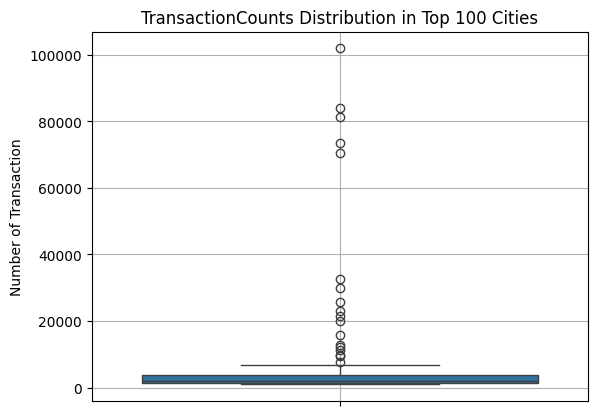

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_100_df = top_100.reset_index()
top_100_df.columns = ['CustLocation', 'TransactionCounts']

sns.boxplot(y=top_100_df['TransactionCounts'])
plt.title('TransactionCounts Distribution in Top 100 Cities')
plt.ylabel('Number of Transaction')
plt.grid(True)
plt.show()

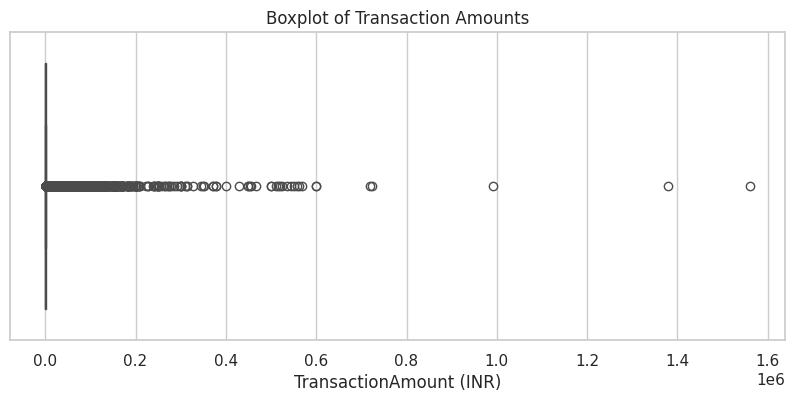

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 1: Transaction Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["TransactionAmount (INR)"])
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("TransactionAmount (INR)")
plt.show()

In [ ]:
# Step 1: Calculate IQR
Q1 = df_Fact1_clean["TransactionAmount (INR)"].quantile(0.25)
Q3 = df_Fact1_clean["TransactionAmount (INR)"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Get outliers
below_lower = df_Fact1_clean[df_Fact1_clean["TransactionAmount (INR)"] < lower_bound]
above_upper = df_Fact1_clean[df_Fact1_clean["TransactionAmount (INR)"] > upper_bound]

# Step 4: Print counts
print(f"Count of values below lower bound ({lower_bound:.2f}): {below_lower.shape[0]}")
print(f"Count of values above upper bound ({upper_bound:.2f}): {above_upper.shape[0]}")

Count of values below lower bound (-1396.58): 0
Count of values above upper bound (2757.95): 110744


In [ ]:
def remove_upper_outliers(data, column, upper_percent=0.02):
    upper_limit = data[column].quantile(1 - upper_percent)
    filtered = data[data[column] <= upper_limit]

    print(f"Removed top {upper_percent*100:.2f}% of values above {upper_limit:.2f}")
    print(f"Remaining rows: {filtered.shape[0]} / {data.shape[0]} "
          f"({100 * filtered.shape[0] / data.shape[0]:.2f}%)")

    return filtered

In [ ]:
df_Fact1_clean = remove_upper_outliers(df_Fact1_clean, "TransactionAmount (INR)")

Removed top 2.00% of values above 11155.00
Remaining rows: 1019743 / 1040554 (98.00%)


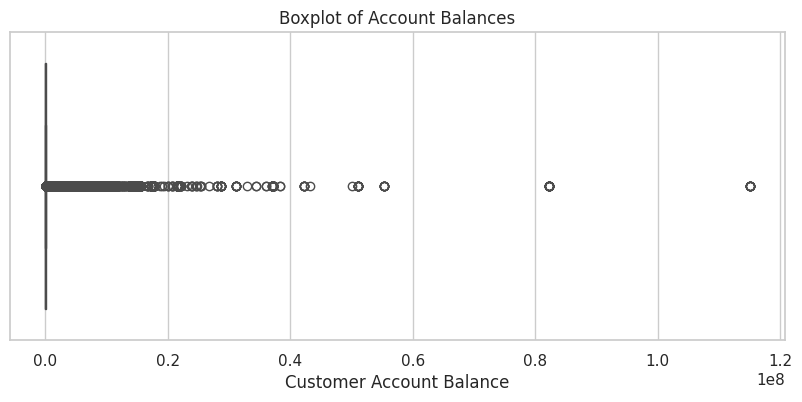

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 2: Account Balance
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["CustAccountBalance"])
plt.title("Boxplot of Account Balances")
plt.xlabel("Customer Account Balance")
plt.show()

In [ ]:
# Step 1: Calculate IQR
Q1 = df_Fact1_clean["CustAccountBalance"].quantile(0.25)
Q3 = df_Fact1_clean["CustAccountBalance"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Get outliers
below_lower = df_Fact1_clean[df_Fact1_clean["CustAccountBalance"] < lower_bound]
above_upper = df_Fact1_clean[df_Fact1_clean["CustAccountBalance"] > upper_bound]

# Step 4: Print counts
print(f"Count of values below lower bound ({lower_bound:.2f}): {below_lower.shape[0]}")
print(f"Count of values above upper bound ({upper_bound:.2f}): {above_upper.shape[0]}")

Count of values below lower bound (-71764.20): 0
Count of values above upper bound (131975.16): 136061


In [ ]:
df_Fact1_clean = remove_upper_outliers(df_Fact1_clean, "CustAccountBalance")

Removed top 2.00% of values above 882898.00
Remaining rows: 999372 / 1019743 (98.00%)


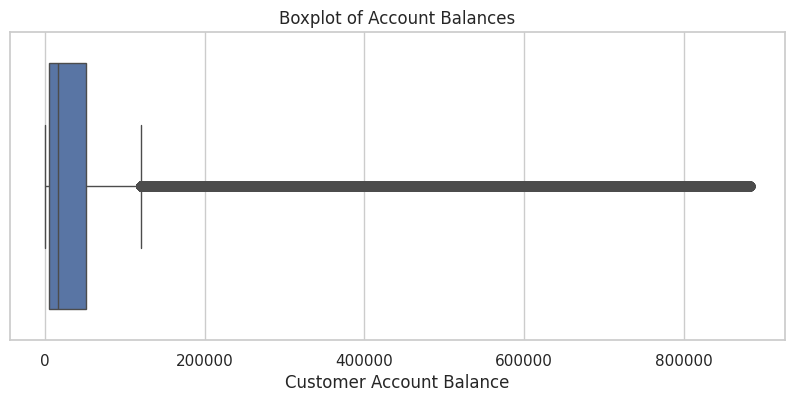

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 2: Account Balance
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["CustAccountBalance"])
plt.title("Boxplot of Account Balances")
plt.xlabel("Customer Account Balance")
plt.show()

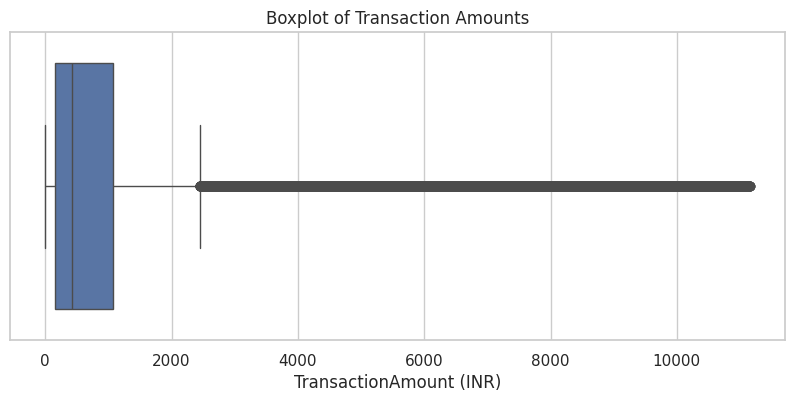

In [ ]:
# Optional: Set up a nice theme
sns.set(style="whitegrid")

# Plot 1: Transaction Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_Fact1_clean["TransactionAmount (INR)"])
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("TransactionAmount (INR)")
plt.show()

In [ ]:
total_transactions = top_100_df['TransactionCounts'].sum()
print(total_transactions)

816861


In [ ]:
df_Fact1_clean2 = df_Fact1_clean.copy()

In [ ]:
# Unify the same city name
df_Fact1_clean2['CustLocation'] = df_Fact1_clean2['CustLocation'].replace(
    {'BENGALURU': 'BANGALORE', 'BENGALOORU': 'BANGALORE', 'BENGALORE': 'BANGALORE'})

In [ ]:
top_100 = df_Fact1_clean2['CustLocation'].value_counts().head(100)
print(top_100)

CustLocation
MUMBAI               96788
BANGALORE            80641
NEW DELHI            78845
GURGAON              70179
DELHI                67869
                     ...  
ROHTAK                 971
HOOGHLY                945
YAMUNANAGAR            934
THRISSUR               921
SOUTH 24 PARGANAS      917
Name: count, Length: 100, dtype: int64


In [ ]:
#Display the 5 top Locations
import sqlite3
conn = sqlite3.connect('transactions.db')
df_Fact1_clean2.to_sql('transactions', conn, if_exists='replace', index=False)

999372

In [ ]:
query = """
SELECT CustLocation, COUNT(*) AS transaction_count
FROM transactions
GROUP BY CustLocation
ORDER BY transaction_count DESC
LIMIT 5
"""

top_locations = pd.read_sql_query(query, conn)
print(top_locations)

  CustLocation  transaction_count
0       MUMBAI              96788
1    BANGALORE              80641
2    NEW DELHI              78845
3      GURGAON              70179
4        DELHI              67869


In [ ]:
#RFM analysis
#set analysis date
analysis_date = df_Fact1_clean2['TransactionDate'].max() + pd.Timedelta(days=1)
print("Analysis date:", analysis_date)

Analysis date: 2016-12-10 00:00:00


In [ ]:
#Calculate Recency，Frequency，Monetary
rfm = df_Fact1_clean2.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (analysis_date - x.max()).days,
    'TransactionID': 'count',
    'TransactionAmount (INR)': 'sum'
}).reset_index()

In [ ]:
#Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,75,2,5106.00
1,C1010012,118,1,1499.00
2,C1010014,155,2,1455.00
3,C1010018,86,1,30.00
4,C1010024,114,1,5000.00
5,C1010028,103,1,557.00
6,C1010031,246,2,1864.00
7,C1010035,105,2,750.00
8,C1010036,106,1,208.00
9,C1010038,154,1,100.00


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,849155.00,849155.00,849155.00
mean,130.11,1.18,1142.71
std,80.22,0.44,1685.72
min,1.00,1.00,0.01
25%,87.00,1.00,199.00
50%,110.00,1.00,500.00
75%,155.00,1.00,1350.03
max,337.00,6.00,23054.75


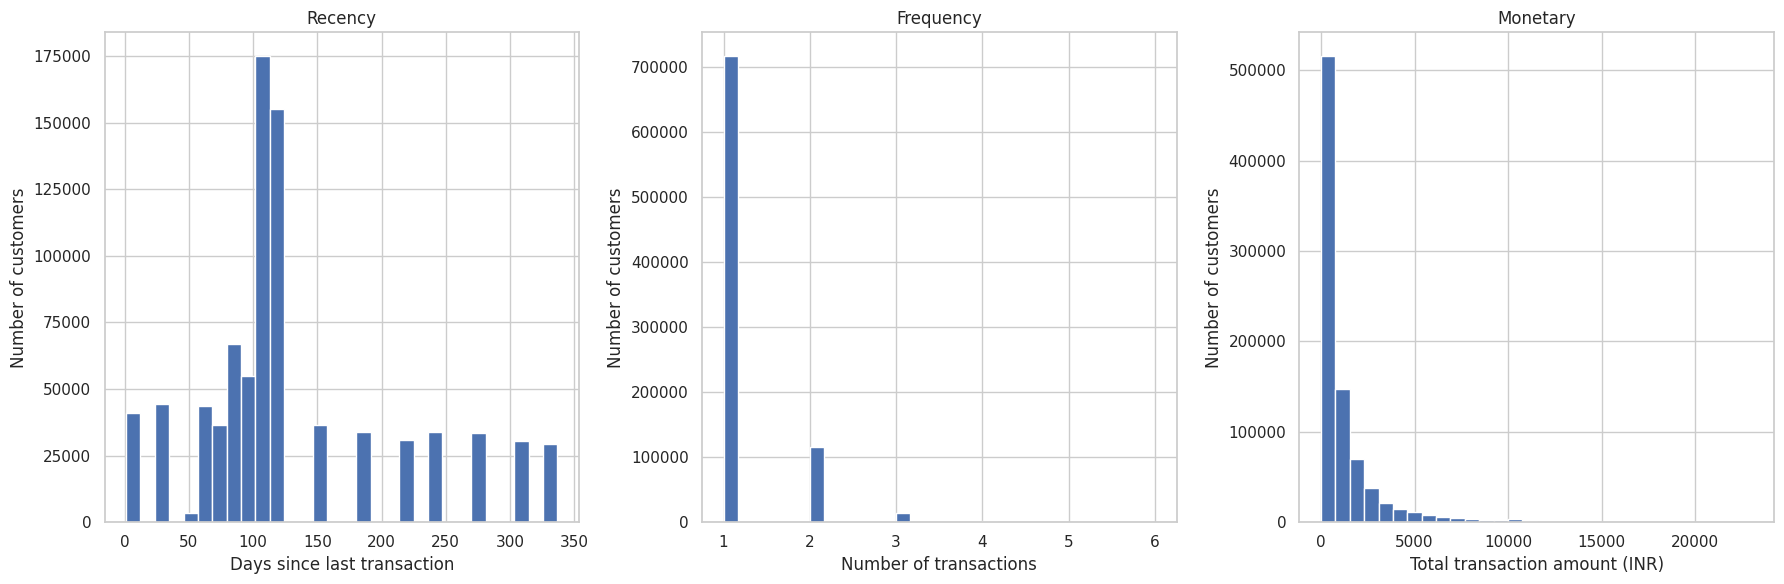

In [ ]:
#Check Distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Recency
axs[0].hist(rfm['Recency'], bins=30)
axs[0].set_title('Recency')
axs[0].set_xlabel('Days since last transaction')
axs[0].set_ylabel('Number of customers')

# Frequency
axs[1].hist(rfm['Frequency'], bins=30)
axs[1].set_title('Frequency')
axs[1].set_xlabel('Number of transactions')
axs[1].set_ylabel('Number of customers')

# Monetary
axs[2].hist(rfm['Monetary'], bins=30)
axs[2].set_title('Monetary')
axs[2].set_xlabel('Total transaction amount (INR)')
axs[2].set_ylabel('Number of customers')

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

rfm_boxcox = pd.DataFrame({
    'CustomerID': rfm['CustomerID'],
    'Recency': stats.boxcox(rfm['Recency'] + 1)[0],
    'Frequency': stats.boxcox(rfm['Frequency'])[0],
    'Monetary': stats.boxcox(rfm['Monetary'] + 1)[0]
})

In [ ]:
rfm_boxcox.head(10)

,CustomerID,Recency,Frequency,Monetary
0,C1010011,18.25,0.12,13.94
1,C1010012,23.94,0.00,11.08
2,C1010014,28.13,0.12,11.01
3,C1010018,19.82,0.00,4.15
4,C1010024,23.45,0.00,13.88
5,C1010028,22.08,0.00,9.03
6,C1010031,36.86,0.12,11.56
7,C1010035,22.33,0.12,9.62
8,C1010036,22.46,0.00,7.20
9,C1010038,28.02,0.00,5.96


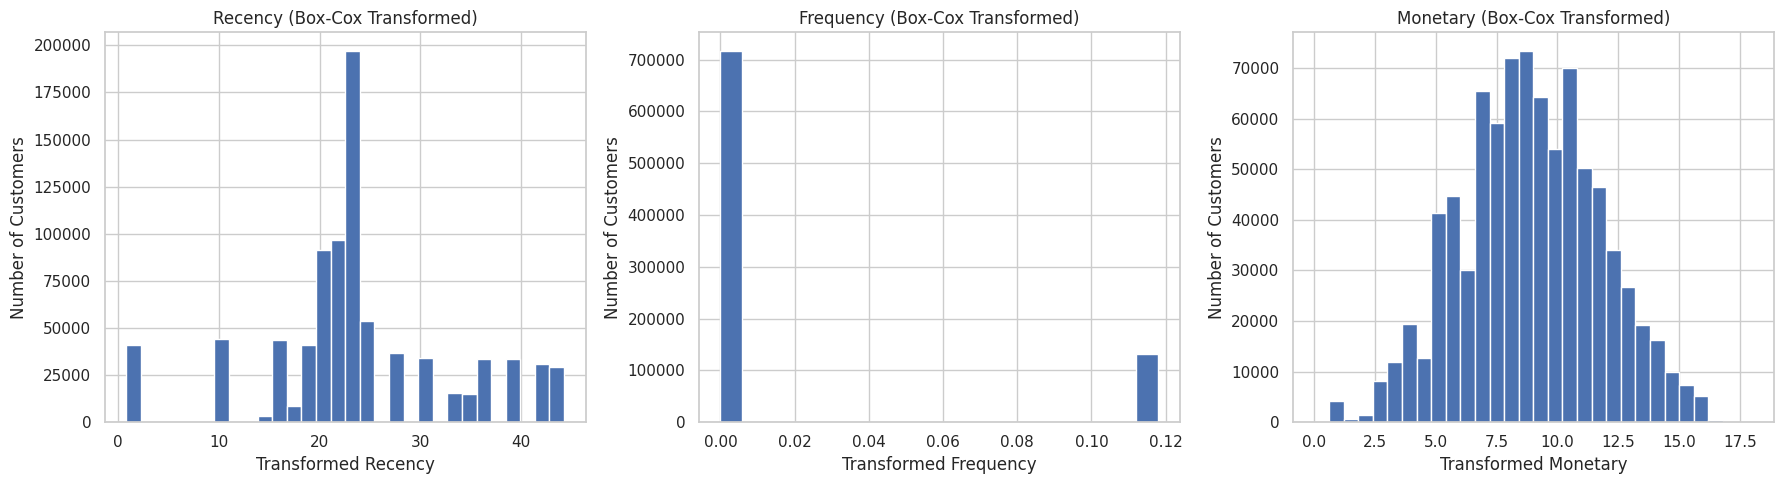

In [ ]:
#Check Distribution after remove skew

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Recency
axs[0].hist(rfm_boxcox['Recency'], bins=30)
axs[0].set_title('Recency (Box-Cox Transformed)')
axs[0].set_xlabel('Transformed Recency')
axs[0].set_ylabel('Number of Customers')

# Frequency
axs[1].hist(rfm_boxcox['Frequency'], bins=20)
axs[1].set_title('Frequency (Box-Cox Transformed)')
axs[1].set_xlabel('Transformed Frequency')
axs[1].set_ylabel('Number of Customers')

# Monetary
axs[2].hist(rfm_boxcox['Monetary'], bins=30)
axs[2].set_title('Monetary (Box-Cox Transformed)')
axs[2].set_xlabel('Transformed Monetary')
axs[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


In [ ]:
# K-means
rfm_boxcox1=rfm_boxcox.copy()

In [ ]:
#Data Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_boxcox1[['Recency', 'Frequency', 'Monetary']])

In [ ]:
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,-0.61,2.33,1.78
1,-0.01,-0.43,0.77
2,0.44,2.33,0.75
3,-0.44,-0.43,-1.68
4,-0.06,-0.43,1.76


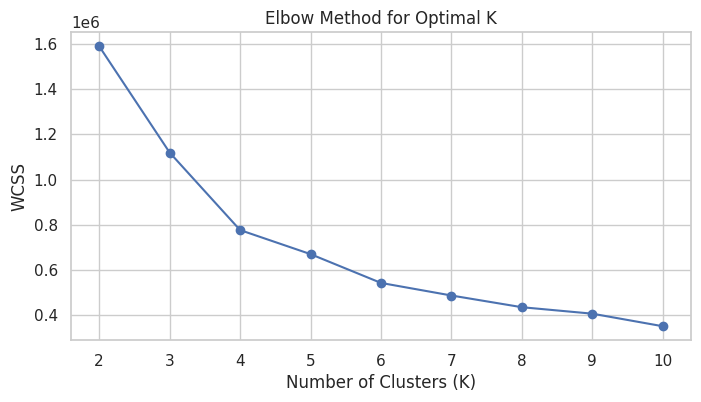

In [ ]:
# Elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Elbow chart
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [ ]:
# Please note:
# Since the calculation steps of Sihouette score are cumbersome and our data size is huge
# we need to limit the sample data size.

In [ ]:
# Silhouette verification
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Limit data sample size
sample_size = 50000
np.random.seed(42)

# Random sampling from rfm_scaled
indices = np.random.choice(rfm_scaled.shape[0], sample_size, replace=False)
rfm_sampled = rfm_scaled[indices]

# Run Silhouette verification
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_sampled)
    score = silhouette_score(rfm_sampled, labels)
    print(f'K={k} Silhouette Score: {score:.4f}')

K=2 Silhouette Score: 0.5062
K=3 Silhouette Score: 0.3607
K=4 Silhouette Score: 0.4184
K=5 Silhouette Score: 0.4004
K=6 Silhouette Score: 0.3803
K=7 Silhouette Score: 0.4186
K=8 Silhouette Score: 0.3863
K=9 Silhouette Score: 0.3786
K=10 Silhouette Score: 0.3607


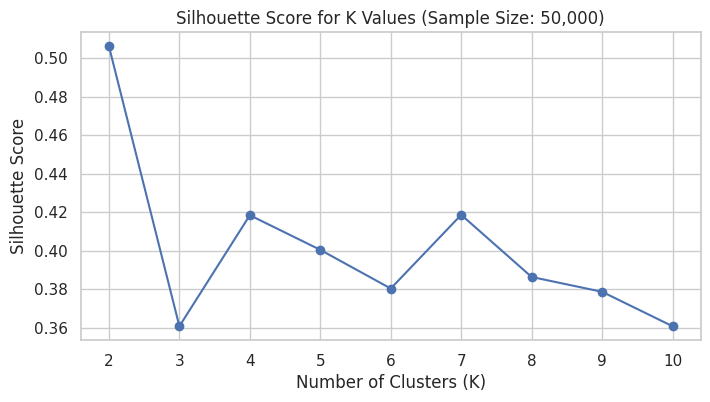

In [ ]:
# Silhouette_scores chart
k_values = list(range(2, 11))
silhouette_scores = [0.5062, 0.3607, 0.4184, 0.4004, 0.3803, 0.4186, 0.3863, 0.3786, 0.3607]

plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for K Values (Sample Size: 50,000)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
#Applying K-means cluster
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
rfm_boxcox1['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [ ]:
# Calculate each group average of RFM
cluster_summary = rfm_boxcox1.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

print(cluster_summary)

         Recency  Frequency  Monetary
Cluster                              
0          38.44       0.00      8.59
1          20.61       0.00      6.26
2          19.45       0.12     10.81
3          20.78       0.00     10.87


In [ ]:
rfm_boxcox1['Cluster'].value_counts()

,count
Cluster,
1,279305
3,270196
0,167539
2,132115


In [ ]:
df_clustered = df_Fact1_clean2.copy()
df_clustered['Cluster'] = rfm_boxcox1['Cluster']

In [ ]:
# Cluster 0
cluster_0_locations = df_clustered[df_clustered['Cluster'] == 0]['CustLocation'].value_counts()

# Cluster 1
cluster_1_locations = df_clustered[df_clustered['Cluster'] == 1]['CustLocation'].value_counts()

# Cluster 2
cluster_2_locations = df_clustered[df_clustered['Cluster'] == 2]['CustLocation'].value_counts()

# Cluster 3
cluster_3_locations = df_clustered[df_clustered['Cluster'] == 3]['CustLocation'].value_counts()

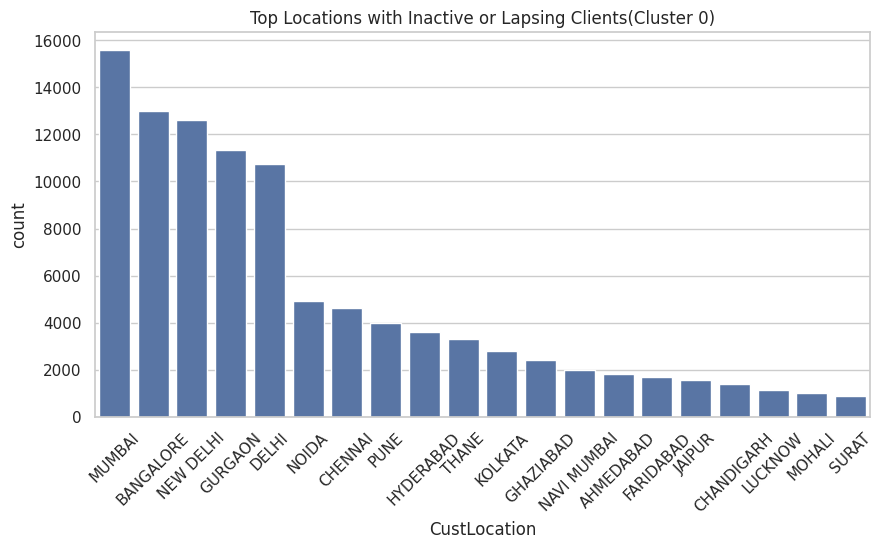

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 0], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with Inactive or Lapsing Clients(Cluster 0)')
plt.xticks(rotation=45)
plt.show()

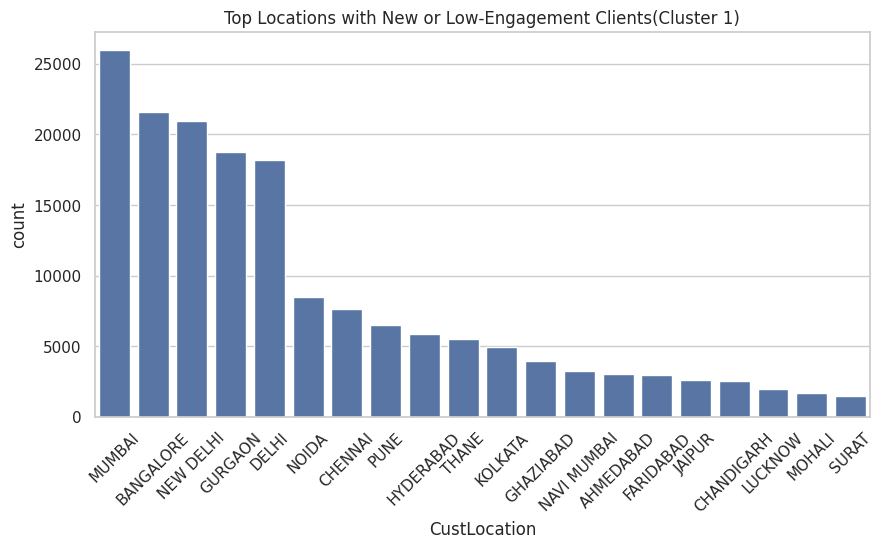

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 1], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with New or Low-Engagement Clients(Cluster 1)')
plt.xticks(rotation=45)
plt.show()

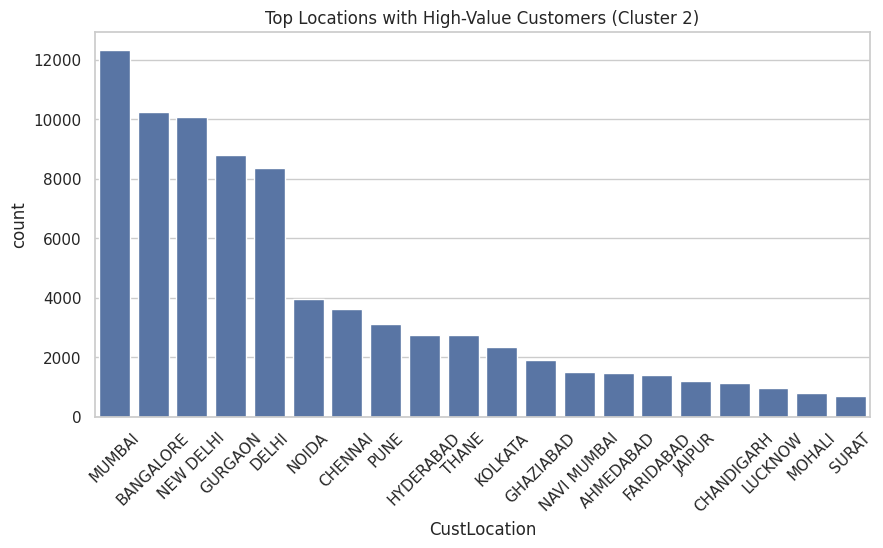

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 2], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with High-Value Customers (Cluster 2)')
plt.xticks(rotation=45)
plt.show()

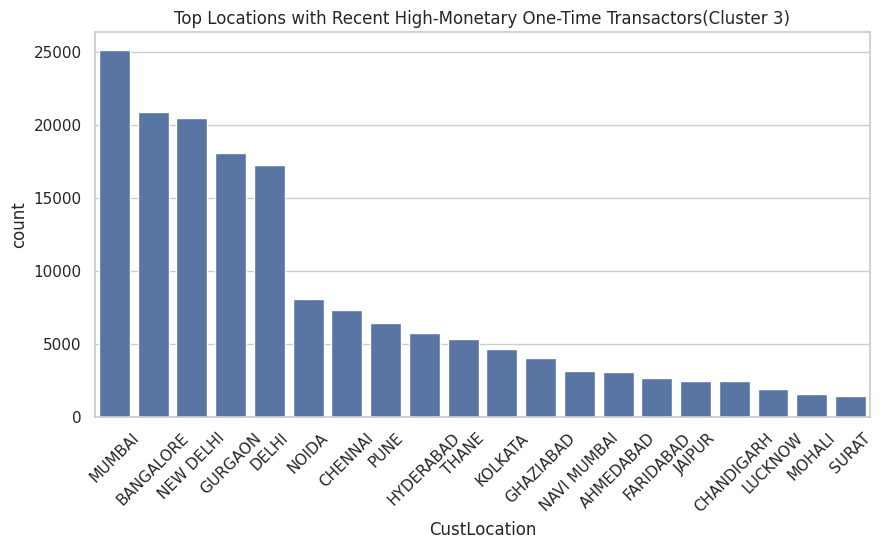

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clustered[df_clustered['Cluster'] == 3], x='CustLocation', order=df_clustered['CustLocation'].value_counts().head(20).index)
plt.title('Top Locations with Recent High-Monetary One-Time Transactors(Cluster 3)')
plt.xticks(rotation=45)
plt.show()